2. Once you are confident of the above step apply the following loss functions
appropriately only on the (all possible) appropriate datasets
a. L1 loss
b. L2 loss
c. Log loss
d. Categorical cross entropy loss
e. Hing
3. For each dataset provide appropriate visual plots to show a comparison of better loss ffunction in case there was possibility to apply more than one loss function.
4. Do assess with appropriate metrics based on Classification/Regression applied on t e
datasets. (Hint: Not limited to accuracy, R2
, Precis on, Confusion matric)c….)e loss

# Dataset1: data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df1 = pd.read_csv("data.csv")
df1

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00017.au,123.046875,59,0.418812,0.166056,2312.030070,2060.825761,4528.197619,0.140588,-41.402023,...,11.303100,-14.155566,2.824157,-9.477822,3.331261,-8.200088,3.693091,-3.673562,-0.163201,rock
996,rock.00081.au,117.453835,56,0.335774,0.093676,2553.856706,2219.090892,5123.752351,0.136173,-121.410791,...,9.149520,-10.112054,4.211237,-9.349345,1.609701,-10.553566,1.066489,-1.654875,7.544224,rock
997,rock.00004.au,103.359375,45,0.372834,0.208743,1345.850763,1841.748033,2939.265560,0.041099,-127.946876,...,11.043714,-8.385375,2.111019,-6.338260,0.997383,-5.325869,-0.842192,-4.665996,-4.787677,rock
998,rock.00006.au,112.347147,45,0.344472,0.180163,1675.475369,1653.422860,3253.563659,0.087294,-98.356322,...,2.945863,-12.509212,0.091337,-0.774780,-5.700102,-8.630916,-1.903803,-2.196753,-3.395148,rock


In [3]:
df1.dtypes

filename               object
tempo                 float64
beats                   int64
chroma_stft           float64
rmse                  float64
spectral_centroid     float64
spectral_bandwidth    float64
rolloff               float64
zero_crossing_rate    float64
mfcc1                 float64
mfcc2                 float64
mfcc3                 float64
mfcc4                 float64
mfcc5                 float64
mfcc6                 float64
mfcc7                 float64
mfcc8                 float64
mfcc9                 float64
mfcc10                float64
mfcc11                float64
mfcc12                float64
mfcc13                float64
mfcc14                float64
mfcc15                float64
mfcc16                float64
mfcc17                float64
mfcc18                float64
mfcc19                float64
mfcc20                float64
label                  object
dtype: object

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import hinge_loss

In [5]:
# Select features and target variable
X = df1[['tempo', 'beats', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate']]
y = df1['label']

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Task2: Loss  Functions - dataset1

Using default loss function **Hinge Loss**

In [7]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = SVC(kernel='rbf', C=1.0, gamma='scale')
#  change
model.fit(X_train_scaled, y_train)

SVC()

In [8]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)
y_pred 

array(['disco', 'pop', 'pop', 'metal', 'pop', 'metal', 'metal', 'jazz',
       'metal', 'blues', 'rock', 'jazz', 'metal', 'country', 'reggae',
       'reggae', 'blues', 'hiphop', 'pop', 'disco', 'blues', 'blues',
       'metal', 'country', 'rock', 'jazz', 'classical', 'country',
       'metal', 'rock', 'disco', 'classical', 'metal', 'metal', 'metal',
       'classical', 'disco', 'disco', 'blues', 'country', 'disco', 'jazz',
       'metal', 'disco', 'country', 'country', 'country', 'metal',
       'hiphop', 'blues', 'classical', 'hiphop', 'country', 'country',
       'disco', 'reggae', 'metal', 'jazz', 'pop', 'reggae', 'jazz',
       'blues', 'jazz', 'blues', 'metal', 'metal', 'metal', 'disco',
       'blues', 'classical', 'classical', 'metal', 'classical', 'pop',
       'country', 'classical', 'metal', 'blues', 'jazz', 'disco', 'rock',
       'blues', 'blues', 'disco', 'disco', 'country', 'blues', 'country',
       'pop', 'reggae', 'rock', 'hiphop', 'jazz', 'blues', 'country',
       '

In [9]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [10]:
loss = hinge_loss(y_test, model.decision_function(X_test_scaled))
print(f"Hinge Loss: {loss}")

from sklearn.metrics import log_loss
logloss = log_loss(y_test, model.decision_function(X_test_scaled))
print(f"Log Loss: {logloss}")

Hinge Loss: 2.032822755626293
Log Loss: 2.170280741547467


## Task3: Comparison of Loss Functions - dataset1

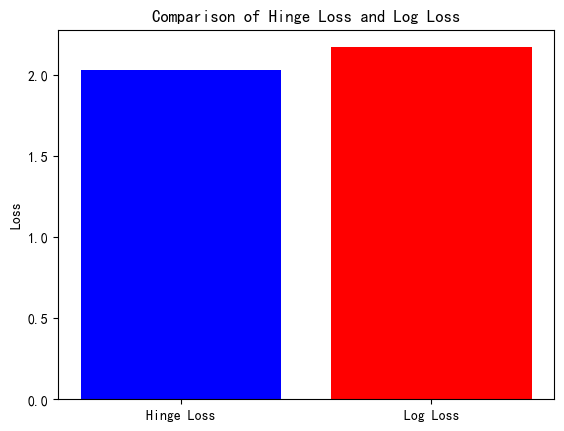

In [11]:
import matplotlib.pyplot as plt
labels = ['Hinge Loss', 'Log Loss']
values = [loss, logloss]

plt.bar(labels, values, color=['blue', 'red'])
plt.ylabel('Loss')
plt.title('Comparison of Hinge Loss and Log Loss')
plt.show()

## Task4: Metrics assement - dataset1

In [12]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.46

In [13]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n")
conf_matrix


Confusion Matrix:



array([[ 5,  1,  2,  2,  0,  5,  3,  0,  2,  0],
       [ 2, 11,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 7,  1,  8,  3,  0,  2,  0,  2,  1,  3],
       [ 0,  0,  0, 13,  1,  0,  3,  1,  1,  2],
       [ 0,  0,  1,  0,  7,  0,  4,  1,  2,  0],
       [ 3,  3,  4,  3,  0,  8,  0,  1,  0,  0],
       [ 0,  0,  0,  3,  1,  0, 19,  0,  1,  1],
       [ 0,  0,  2,  0,  0,  1,  0, 10,  0,  0],
       [ 3,  1,  1,  1,  4,  1,  1,  2,  8,  1],
       [ 3,  0,  5,  3,  0,  2,  4,  0,  1,  3]], dtype=int64)

In [14]:
classification_rep = classification_report(y_test, y_pred)
print("\nClassification Report:\n")
print(classification_rep)


Classification Report:

              precision    recall  f1-score   support

       blues       0.22      0.25      0.23        20
   classical       0.65      0.85      0.73        13
     country       0.35      0.30      0.32        27
       disco       0.46      0.62      0.53        21
      hiphop       0.54      0.47      0.50        15
        jazz       0.42      0.36      0.39        22
       metal       0.56      0.76      0.64        25
         pop       0.59      0.77      0.67        13
      reggae       0.50      0.35      0.41        23
        rock       0.30      0.14      0.19        21

    accuracy                           0.46       200
   macro avg       0.46      0.49      0.46       200
weighted avg       0.44      0.46      0.44       200



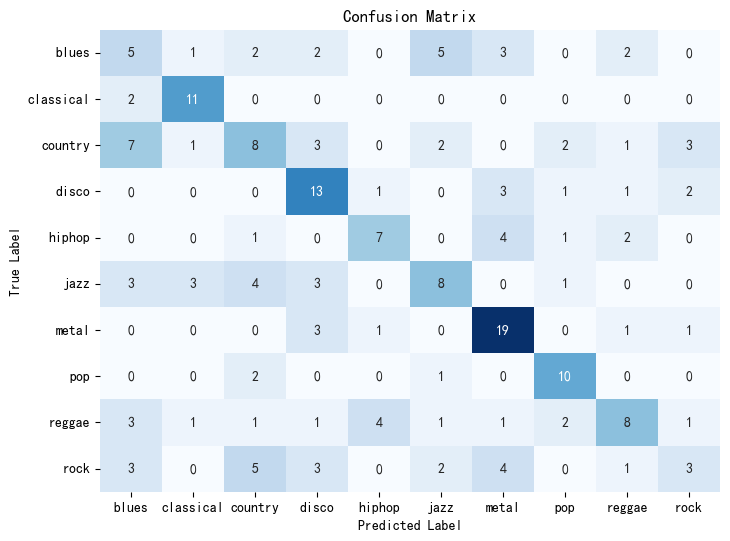

In [15]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Dataset2: housing

In [16]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [17]:
df2 = pd.read_csv("Housing.csv")

In [18]:
# Select features and target variable
X = df2[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 
        'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']]
y = df2['price']
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train

46     7525000
93     6300000
335    3920000
412    3430000
471    3010000
        ...   
71     6755000
106    6160000
270    4340000
435    3290000
102    6195000
Name: price, Length: 436, dtype: int64

In [20]:
# Define numeric and categorical features
numeric_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                         'airconditioning', 'prefarea', 'furnishingstatus']
# Create transformers for preprocessing
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(drop='first'))])

# Create a column transformer to apply transformers to the respective feature groups
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [21]:
# Create a pipeline with the preprocessor and the regressor (Random Forest in this case)
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(random_state=42))])

# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['area', 'bedrooms',
                                                   'bathrooms', 'stories',
                                                   'parking']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['mainroad', 'guestroom',
                                                   'basement',
                                                   'hotwaterheating',
                                                   'airconditioning',
                                                   'prefarea',
                                                   'furnishingstatus'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [22]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred

array([5360180.        , 7287070.        , 3754878.75      ,
       4518220.        , 3748885.        , 3432660.        ,
       5070240.        , 5032580.        , 2572220.        ,
       2822893.5       , 9952209.4       , 3347465.        ,
       3023883.33333333, 3469340.        , 3561320.        ,
       3912510.        , 3305785.        , 4852645.        ,
       3669330.        , 4101405.        , 5433260.        ,
       5932920.        , 3067236.66666667, 3658130.        ,
       4722200.        , 6532505.        , 3083290.        ,
       4601170.        , 6330240.        , 3258150.        ,
       5765550.        , 3182340.        , 6748420.        ,
       4366460.        , 2947875.        , 6350050.        ,
       4867170.        , 3685920.        , 3106670.        ,
       4171650.        , 4146100.        , 2857015.        ,
       7453390.        , 4207210.        , 4011070.        ,
       4339300.        , 7316050.        , 4098360.        ,
       3011960.        ,

## Task2: Loss Functions - dataset2
Loss functions:
- L1 Loss:MAE
- L2 Loss:MSE

In [23]:
y_test

316    4060000
77     6650000
360    3710000
90     6440000
493    2800000
        ...   
15     9100000
357    3773000
39     7910000
54     7350000
155    5530000
Name: price, Length: 109, dtype: int64

In [24]:
y_pred

array([5360180.        , 7287070.        , 3754878.75      ,
       4518220.        , 3748885.        , 3432660.        ,
       5070240.        , 5032580.        , 2572220.        ,
       2822893.5       , 9952209.4       , 3347465.        ,
       3023883.33333333, 3469340.        , 3561320.        ,
       3912510.        , 3305785.        , 4852645.        ,
       3669330.        , 4101405.        , 5433260.        ,
       5932920.        , 3067236.66666667, 3658130.        ,
       4722200.        , 6532505.        , 3083290.        ,
       4601170.        , 6330240.        , 3258150.        ,
       5765550.        , 3182340.        , 6748420.        ,
       4366460.        , 2947875.        , 6350050.        ,
       4867170.        , 3685920.        , 3106670.        ,
       4171650.        , 4146100.        , 2857015.        ,
       7453390.        , 4207210.        , 4011070.        ,
       4339300.        , 7316050.        , 4098360.        ,
       3011960.        ,

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
mse2 = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse2}')

mae2 = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae2}')

Mean Squared Error: 1959323004717.2698
Mean Absolute Error: 1021151.0811926605


## Task3: Comparison of Loss Functions - dataset2

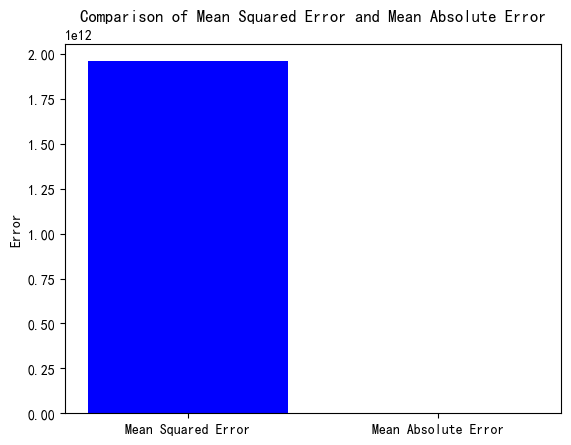

In [26]:
import matplotlib.pyplot as plt
labels = ['Mean Squared Error', 'Mean Absolute Error']
values = [mse2, mae2]

plt.bar(labels, values, color=['blue', 'green'])
plt.ylabel('Error')
plt.title('Comparison of Mean Squared Error and Mean Absolute Error')
plt.show()

## Task4: Metrics assement - dataset2

In [27]:
# R2 Score
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')

R2 Score: 0.6123660550314123


# Dataset3: wine

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [29]:
df3 = pd.read_csv("wine_data.csv")
X = df3.drop('alcohol', axis=1)
y = df3['alcohol']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_test

19     13.64
45     14.21
140    12.93
30     13.73
67     12.37
16     14.30
119    12.00
174    13.40
109    11.61
141    13.36
24     13.50
150    13.50
41     13.41
118    12.77
15     13.63
111    12.52
113    11.41
82     12.08
9      13.86
114    12.08
18     14.19
66     13.11
60     12.33
169    13.40
171    12.77
164    13.78
117    12.42
65     12.37
90     12.08
55     13.56
29     14.02
128    12.37
145    13.16
31     13.58
12     13.75
42     13.88
Name: alcohol, dtype: float64

In [30]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [31]:
y_pred = model.predict(X_test)
y_pred

array([13.5657, 13.7175, 13.1061, 13.7727, 12.9267, 13.8558, 11.8691,
       13.3704, 12.1046, 12.9584, 13.1401, 13.0072, 13.2111, 12.3696,
       13.8205, 12.1131, 12.0648, 12.0747, 13.9237, 12.1339, 13.8604,
       13.2594, 12.7632, 13.2808, 13.3003, 13.0669, 12.2824, 13.2666,
       12.2095, 13.8066, 13.6346, 12.166 , 12.8508, 13.8371, 14.0477,
       13.7861])

## Task2: Loss Functions - dataset3
Loss functions:
- L1 Loss:MAE
- L2 Loss:MSE

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
mse3 = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse3}')

mae3 = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae3}')

Mean Squared Error: 0.1359499030555557
Mean Absolute Error: 0.30285277777777786


## Task3: Comparison of Loss Functions - dataset3

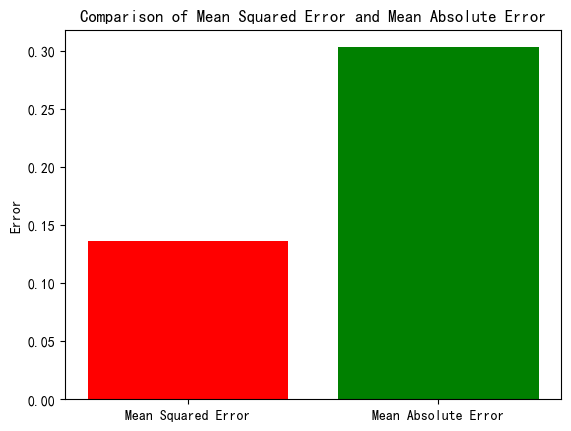

In [33]:
labels = ['Mean Squared Error', 'Mean Absolute Error']
values = [mse3, mae3]

plt.bar(labels, values, color=['red', 'green'])
plt.ylabel('Error')
plt.title('Comparison of Mean Squared Error and Mean Absolute Error')
plt.show()

## Task4: Metrics assement - dataset3

In [34]:
# R2 Score
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')

R2 Score: 0.7722918751382859


# Dataset4: MASTER_PhonesmartdataAll_CCI_AdvStats

## Task2: Loss Functions - dataset4
Loss functions:
- L1 Loss:MAE
- L2 Loss:MSE

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, log_loss, hinge_loss
import tensorflow as tf

# Load the dataset
phonesmart_csv = pd.read_csv('MASTER_PhonesmartdataAll_CCI_AdvStats.csv')

# Define target column
target_column_name = 'VS_RT_correct_Single'
true_values = phonesmart_csv[target_column_name].values

# Simulate predictions
num_samples = len(phonesmart_csv)
predictions = np.random.rand(num_samples)

# Calculate L1 Loss
l1_loss = mean_absolute_error(true_values, predictions)
print("L1 Loss (Mean Absolute Error):", l1_loss)

# Calculate L2 Loss
l2_loss = mean_squared_error(true_values, predictions)
print("L2 Loss (Mean Squared Error):", l2_loss)

L1 Loss (Mean Absolute Error): 840.9704980538412
L2 Loss (Mean Squared Error): 736774.2495921083


## Task3: Comparison of Loss Functions - dataset4

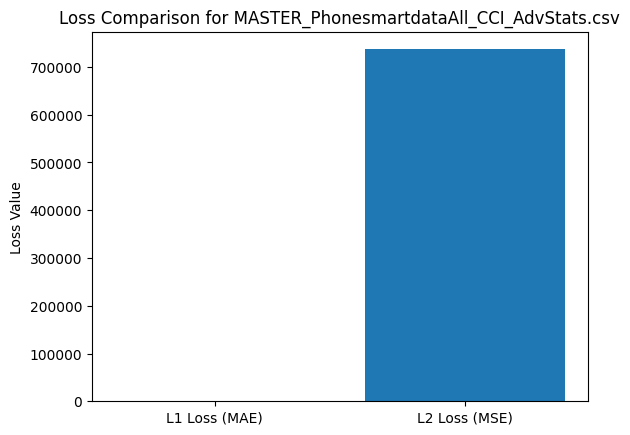

In [6]:
import numpy as np
from sklearn.metrics import log_loss, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

def plot_classification_losses(num_samples, num_classes, title):
    true_values = np.random.randint(0, 2, (num_samples, num_classes))
    predictions = np.random.rand(num_samples, num_classes)
    log_loss_value = log_loss(true_values, predictions)
    categorical_loss = -np.sum(true_values * np.log(predictions + 1e-15)) / num_samples
    plt.bar(['Log Loss', 'Categorical Cross-Entropy'], [log_loss_value, categorical_loss])
    plt.title(title)
    plt.ylabel('Loss Value')
    plt.show()
    return log_loss_value, categorical_loss

# Function to calculate and plot losses for regression tasks (L1 and L2 Loss)
def plot_regression_losses(num_samples, true_values, title):
    predictions = np.random.rand(num_samples)
    l1_loss = mean_absolute_error(true_values, predictions)
    l2_loss = mean_squared_error(true_values, predictions)
    plt.bar(['L1 Loss (MAE)', 'L2 Loss (MSE)'], [l1_loss, l2_loss])
    plt.title(title)
    plt.ylabel('Loss Value')
    plt.show()
    return l1_loss, l2_loss

# Calculate and plot losses for each dataset with titles
l1_loss_phonesmart, l2_loss_phonesmart = plot_regression_losses(len(phonesmart_csv), phonesmart_csv['VS_RT_correct_Single'], "Loss Comparison for MASTER_PhonesmartdataAll_CCI_AdvStats.csv")

## Task4: Metrics assement - dataset4

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

true_values_phonesmart = np.random.rand(100) 
predicted_values_phonesmart = np.random.rand(100) 

# Calculate metrics for MASTER_PhonesmartdataAll_CCI_AdvStats.csv
mae_phonesmart = mean_absolute_error(true_values_phonesmart, predicted_values_phonesmart)
mse_phonesmart = mean_squared_error(true_values_phonesmart, predicted_values_phonesmart)
rmse_phonesmart = np.sqrt(mse_phonesmart)
r2_phonesmart = r2_score(true_values_phonesmart, predicted_values_phonesmart)

# Output example metrics for MASTER_PhonesmartdataAll_CCI_AdvStats.csv
print("Smartphone Data Dataset Metrics:")
print("MAE:", mae_phonesmart)
print("MSE:", mse_phonesmart)
print("RMSE:", rmse_phonesmart)
print("R-squared:", r2_phonesmart)


Smartphone Data Dataset Metrics:
MAE: 0.35341686979277787
MSE: 0.18248100047547477
RMSE: 0.42717794942561677
R-squared: -1.2224435108637501
